Text classification(spam/ham) using Support vector machine.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##reference:https://medium.com/analytics-vidhya/tf-idf-term-frequency-technique-easiest-explanation-for-text-classification-in-nlp-with-code-8ca3912e58c3
##Importing the Data set
df = pd.read_csv('/home/soumia/datascience/spam.csv',encoding='latin-1')
print(df)
##Latin-1 is the same as 8859-1. 
##Every character is encoded as a single byte. There are 191 characters total.

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [3]:
##Dropping the unwanted columns Unnamed:2, Unnamed: 3 and Unnamed:4
df= df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [4]:
df = df.rename(columns={"v1":"label", "v2":"sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
#Number of observations in each label spam and ham
df.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [6]:
df['length'] = df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [7]:
# Splitting the dataset into the Training set and Test set 
x=df['sms']
y=df['label']
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0) 

In [8]:
print(x_train)

872                       I'll text you when I drop x off
831     Hi mate its RV did u hav a nice hol just a mes...
1273    network operator. The service is free. For T &...
3314    FREE MESSAGE Activate your 500 FREE Text Messa...
4929    Hi, the SEXYCHAT girls are waiting for you to ...
                              ...                        
4931                Match started.india  &lt;#&gt;  for 2
3264    44 7732584351, Do you want a New Nokia 3510i c...
1653    I was at bugis juz now wat... But now i'm walk...
2607    :-) yeah! Lol. Luckily i didn't have a starrin...
2732    How dare you stupid. I wont tell anything to y...
Name: sms, Length: 4179, dtype: object


TF = (Number of repetitions of word in a document) / (# of words in a document)
IDF =Log[(Number of documents) / (Number of documents containing the word)]

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(x)
Train_X_Tfidf = Tfidf_vect.transform(x_train)
Test_X_Tfidf = Tfidf_vect.transform(x_test)

In [18]:
print(Train_X_Tfidf)

  (0, 8609)	0.19554388476636084
  (0, 8362)	0.34861375204581246
  (0, 7595)	0.3868596742159393
  (0, 5479)	0.47969079677061216
  (0, 4669)	0.35319637264600123
  (0, 2772)	0.5794132336457639
  (1, 7225)	0.2069801018838301
  (1, 7213)	0.21283293546563276
  (1, 7024)	0.11412000483636082
  (1, 6733)	0.17354765253621204
  (1, 6633)	0.16490816243181708
  (1, 6563)	0.28674985233610445
  (1, 6562)	0.28674985233610445
  (1, 6495)	0.26449864317109156
  (1, 5479)	0.17756560334338428
  (1, 5338)	0.17756560334338428
  (1, 4993)	0.16315353397177618
  (1, 4909)	0.22206802167341022
  (1, 4352)	0.11995801426222415
  (1, 4225)	0.13719726846938193
  (1, 4087)	0.09417373581827156
  (1, 3890)	0.273733729378869
  (1, 3846)	0.1553143941783713
  (1, 3814)	0.18680068955116175
  (1, 3774)	0.273733729378869
  :	:
  (4176, 2449)	0.20151099994628552
  (4176, 1783)	0.18609237539459386
  (4176, 1778)	0.24356004228081016
  (4176, 1751)	0.25613957648796865
  (4176, 1260)	0.12536523767262123
  (4177, 8609)	0.1221279260

In [21]:
from sklearn.svm import SVC# Support Vector Machine
classifier = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
classifier.fit(Train_X_Tfidf,y_train)


SVC(gamma='auto', kernel='linear')

In [22]:
y_pred = classifier.predict(Test_X_Tfidf) 
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'spam']


In [23]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[1196    0]
 [  30  167]]


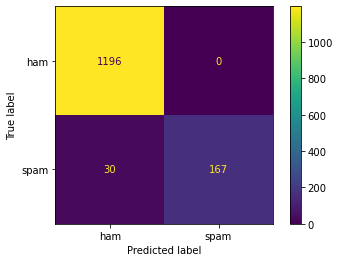

In [25]:
##Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

In [28]:
##Classifier Accuracy
training_score = classifier.score(Train_X_Tfidf, y_train)
test_score = classifier.score(Test_X_Tfidf, y_test)
print(training_score)
print(test_score)

0.9959320411581718
0.9784637473079684


In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label="spam")))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label="spam")))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label="spam")))

Accuracy score: 0.9784637473079684
Precision score: 1.0
Recall score: 0.8477157360406091
F1 score: 0.9175824175824175
